In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("smartcart_customers.csv")

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Data Preprocessing

### 1.Handle missing values


In [5]:
df["Income"] = df["Income"].fillna(df["Income"].median())

### 2.Feature Engineering

In [6]:
# create age by year of birth
df["Age"] = 2026 - df["Year_Birth"]

In [7]:
# customer joining date
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst = True)

refrence_date = df["Dt_Customer"].max()

df["Customer_tenure_days"] = (refrence_date - df["Dt_Customer"]).dt.days

In [8]:
#spending

df["Total_Spending"] = (df["MntWines"] +  df["MntFruits"] +  df["MntMeatProducts"] + 
                        df["MntFishProducts"] + df["MntSweetProducts"] +
                         df["MntGoldProds"])


In [9]:
#Children

df["Total_Children"] = df["Kidhome"] + df["Teenhome"]

In [10]:
#education

df["Education"].value_counts()

#we will keep three categories of education only
#undergrad , grad , postgrad

df["Education"] = df["Education"].replace({
    "Basic" : "Undergraduate" , "2n Cycle" : "Undergraduate","Graduation" : "Graduate",
    "Master" : "Postgraduate" , "PhD" : "Postgraduate"})

In [11]:
df["Education"].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [12]:
#Marital Status

df["Living_with"] = df["Marital_Status"].replace({
    "Married" : "Partner" , "Together" : "Partner","Single" : "Alone",
    "Divorced" : "Alone" , "Widow" : "Alone", "Absurd" : "Alone","YOLO" : "Alone"
})

In [13]:
df["Living_with"].value_counts()

Living_with
Partner    1444
Alone       796
Name: count, dtype: int64

### Drop unnecessray columns

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_Children,Living_with
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,69,663,1617,0,Alone
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,72,113,27,2,Alone
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,61,312,776,0,Partner
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,42,139,53,1,Partner
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,45,161,422,1,Partner


In [15]:
cols = ["ID","Year_Birth","Marital_Status",	"Kidhome","Teenhome",
        "Dt_Customer","MntWines","MntFruits" ,"MntMeatProducts",
        "MntFishProducts","MntSweetProducts","MntGoldProds"]

df_cleaned_data = df.drop(columns = cols , axis =1)

In [16]:
df_cleaned_data.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_Children,Living_with
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


# Outliers

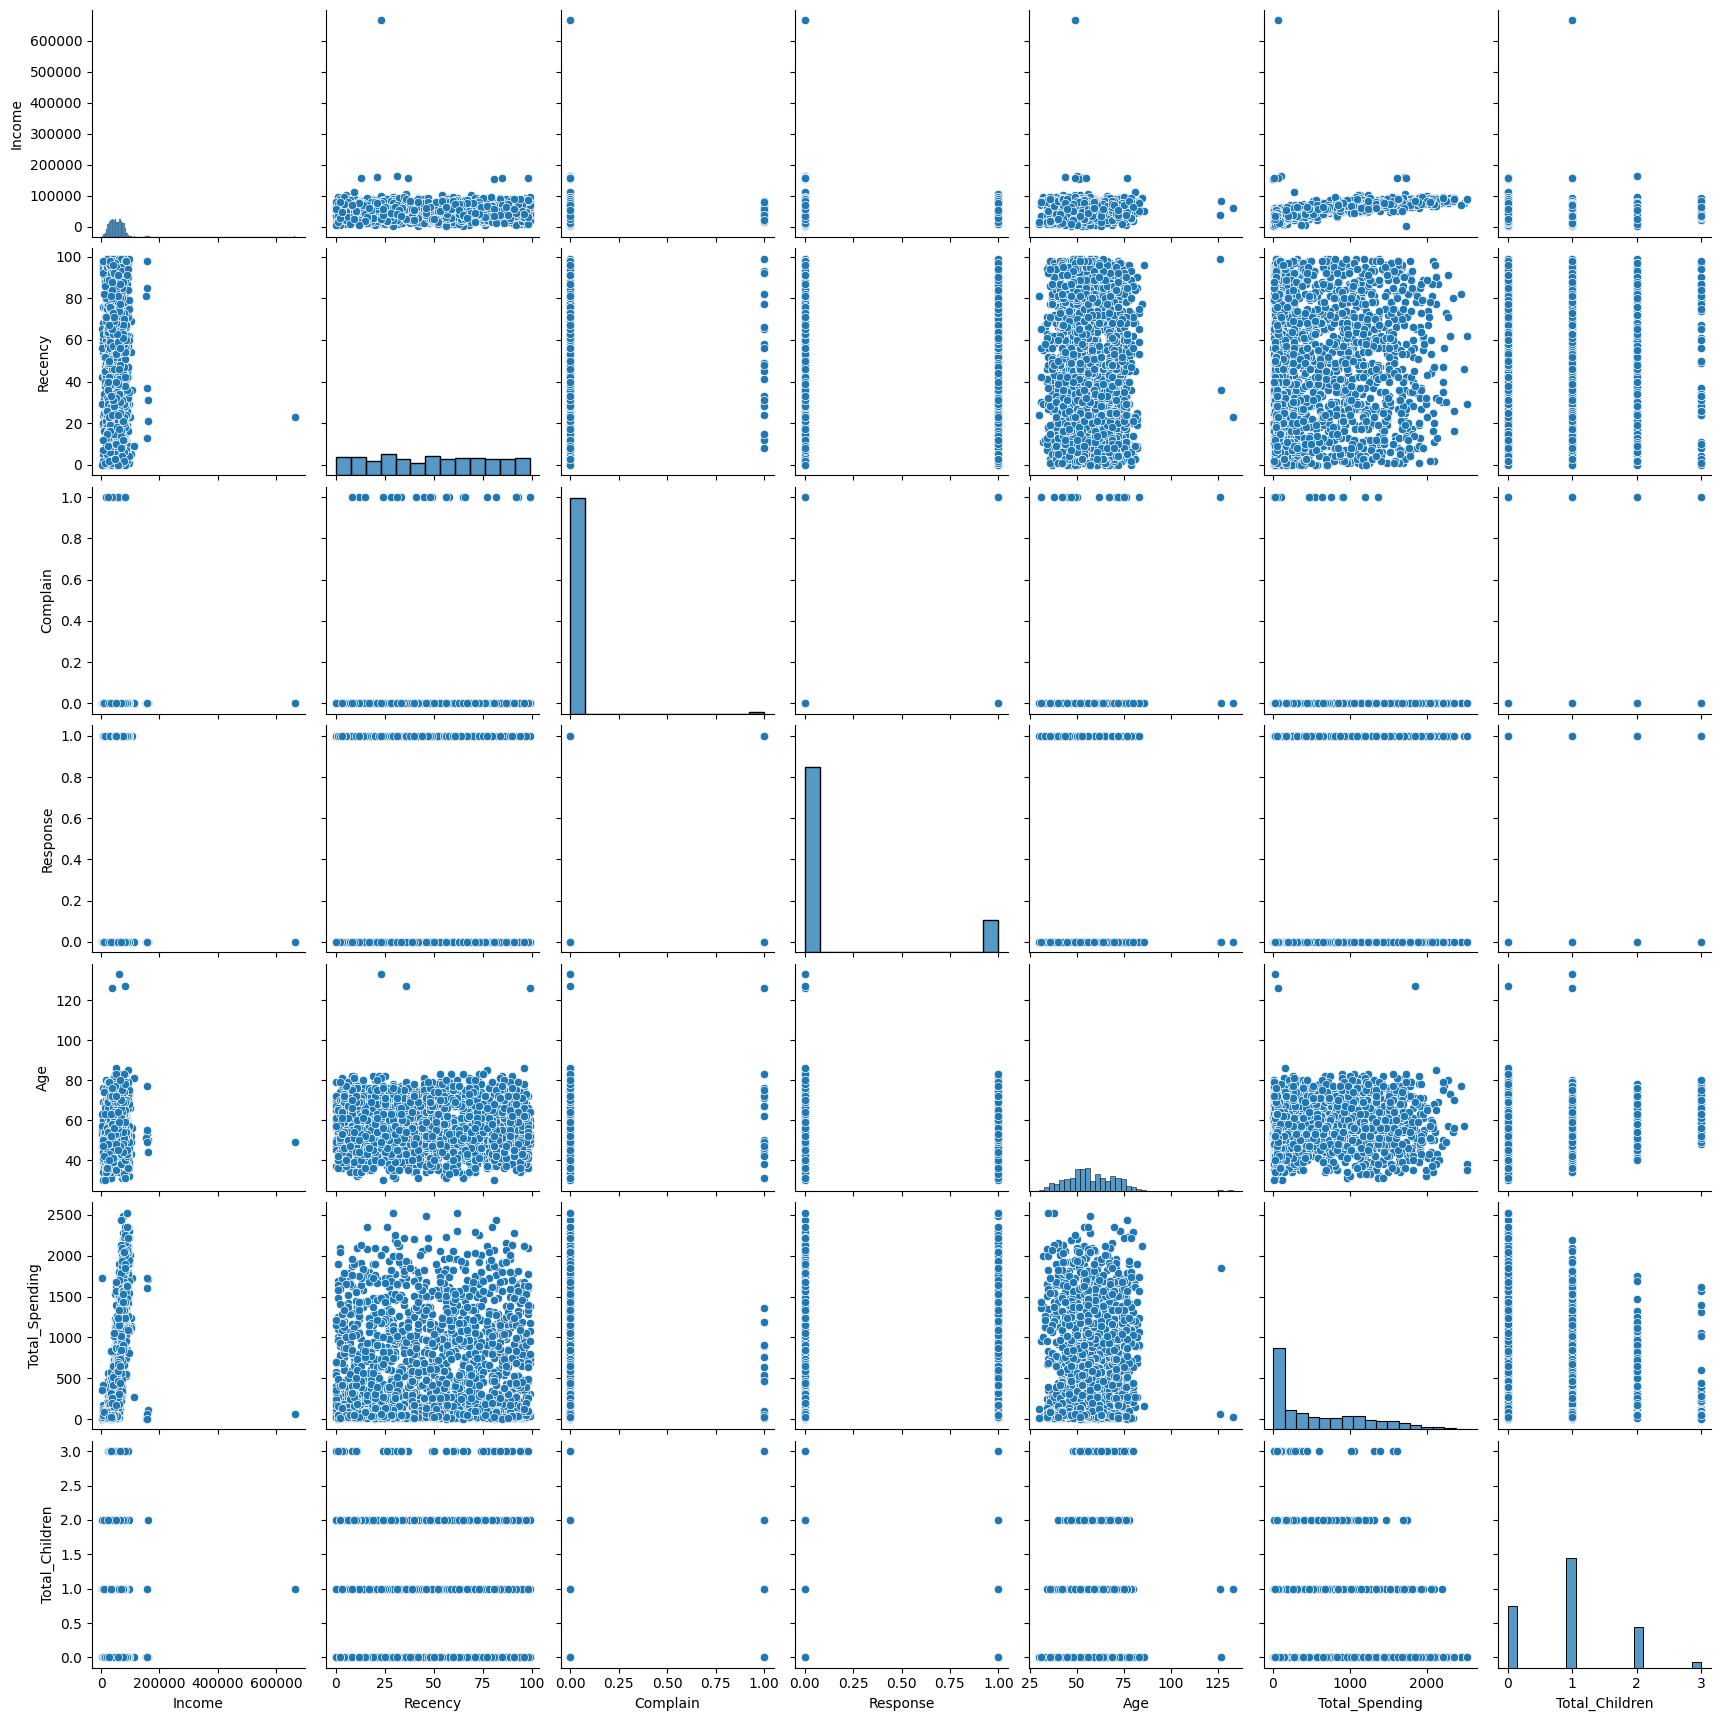

In [17]:
cols = ["Income","Recency","Complain","Response","Age","Total_Spending","Total_Children"]

#relative plots of some features - pair plots
sns.pairplot(df_cleaned_data[cols])

In [18]:
#Remove outliers

print("data size with outliers : ",len(df_cleaned_data))

df_cleaned_data = df_cleaned_data[(df_cleaned_data["Age"] < 90)]
df_cleaned_data = df_cleaned_data[(df_cleaned_data["Income"] < 600_000)]

print("data size without outliers : ",len(df_cleaned_data))

data size with outliers :  2240
data size without outliers :  2236


# Heatmap

In [19]:
corr = df_cleaned_data.corr(numeric_only=True)

<Axes: >

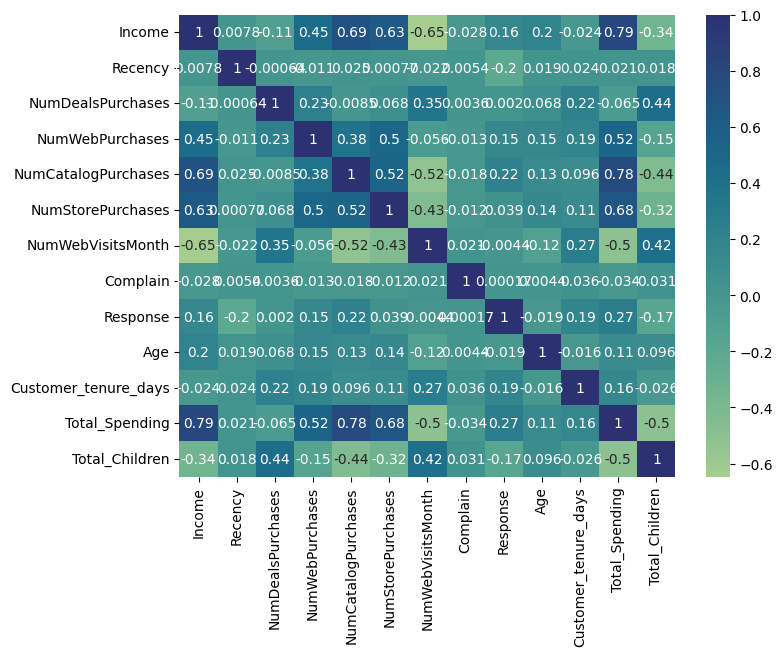

In [20]:
plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    cmap="crest"
)

# Encoding

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe = OneHotEncoder()

cat_cols = ["Living_with","Education"]

enco_cols = ohe.fit_transform(df_cleaned_data[cat_cols])

In [23]:
enc_df = pd.DataFrame(enco_cols.toarray(),columns = ohe.get_feature_names_out(cat_cols),index = df_cleaned_data.index)


In [24]:
df_encoded = pd.concat([df_cleaned_data.drop(columns = cat_cols),enc_df],axis =1)

In [25]:
df_encoded.head()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_Children,Living_with_Alone,Living_with_Partner,Education_Graduate,Education_Postgraduate,Education_Undergraduate
0,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,1.0,0.0,1.0,0.0,0.0
1,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,1.0,0.0,1.0,0.0,0.0
2,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,0.0,1.0,1.0,0.0,0.0
3,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,0.0,1.0,1.0,0.0,0.0
4,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,0.0,1.0,0.0,1.0,0.0


# Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
X = df_encoded

In [28]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

# Visualize

In [29]:
X_scaled.shape

(2236, 18)

In [30]:
#2D
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [31]:
pca = PCA(n_components = 3)

X_pca = pca.fit_transform(X_scaled)

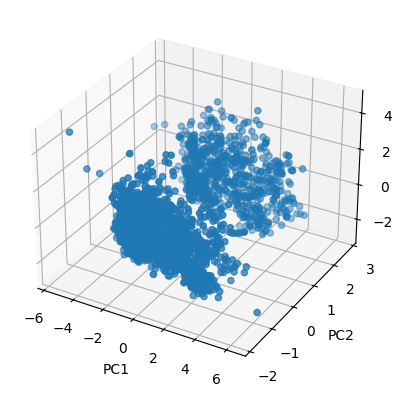

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()


In [33]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

# Analyze k value

### 1.Elbow method

In [34]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []
for k in range (1,11):
    kmeans = KMeans(n_clusters = k ,random_state =42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)

In [35]:
knee = KneeLocator(range(1,11), wcss,curve="convex",direction = "decreasing")
optimal_k = knee.elbow

In [36]:
print("best k : ",optimal_k)

best k :  4


Text(0, 0.5, 'WCSS')

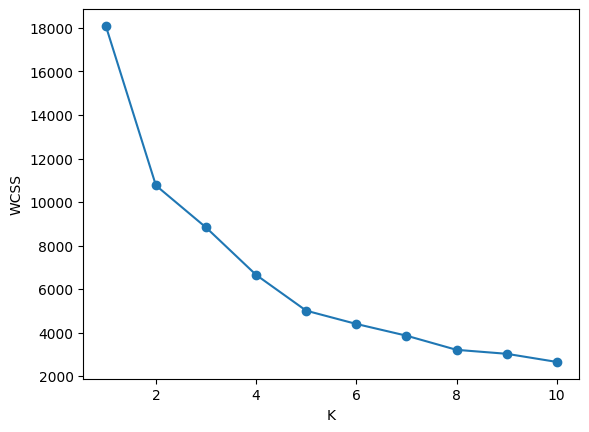

In [37]:
# plot

plt.plot(range(1,11), wcss,marker = 'o')
plt.xlabel("K")
plt.ylabel("WCSS")

### 2.Silhoutte score

Text(0, 0.5, 'Silhouette score')

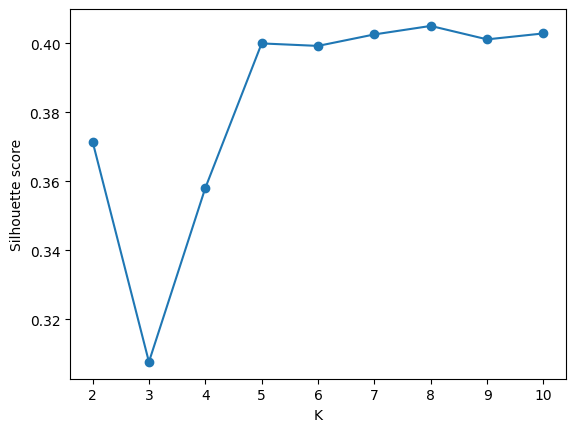

In [38]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2,11):
    kmeans = KMeans(n_clusters = k ,random_state = 42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca,labels)
    scores.append(score)

plt.plot(range(2,11), scores,marker = 'o')
plt.xlabel("K")
plt.ylabel("Silhouette score")

Text(0, 0.5, 'Silhouette_score')

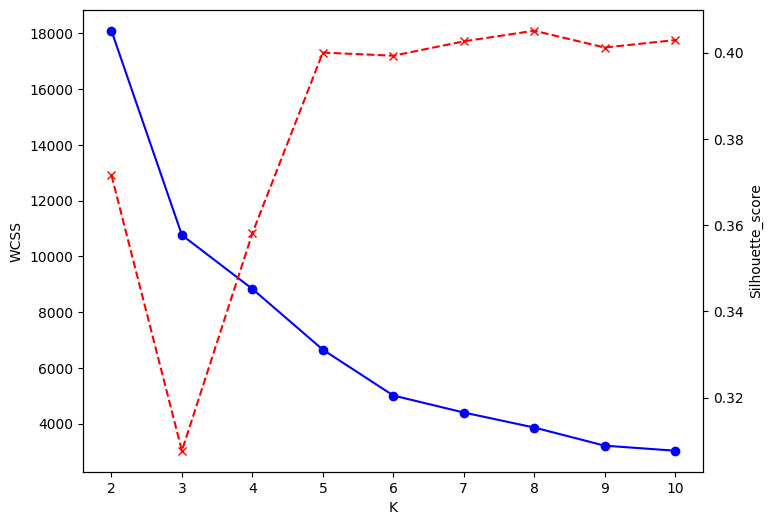

In [39]:
#combined plot

k_range = range(2,11)

fig,ax1 = plt.subplots(figsize = (8,6))
ax1.plot(k_range,wcss[:len(k_range)],marker='o',color = "blue")

plt.xlabel("K")
plt.ylabel("WCSS")

ax2 = ax1.twinx()
ax2.plot(k_range,scores[:len(k_range)],marker='x',color = "red" , linestyle = '--')
ax2.set_ylabel("Silhouette_score")


# Clustering

In [40]:
#K_means

kmeans = KMeans(n_clusters = 4 ,random_state = 42)
labels_kmeans = kmeans.fit_predict(X_pca)

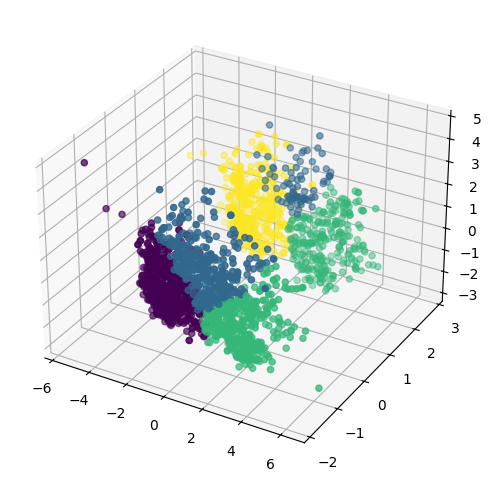

In [41]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111,projection = "3d")

ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c = labels_kmeans)

In [42]:
#Agglomerative clustering

from sklearn.cluster import AgglomerativeClustering

In [50]:
agg_clf = AgglomerativeClustering( n_clusters=4)
labels_agg = agg_clf.fit_predict(X_pca)

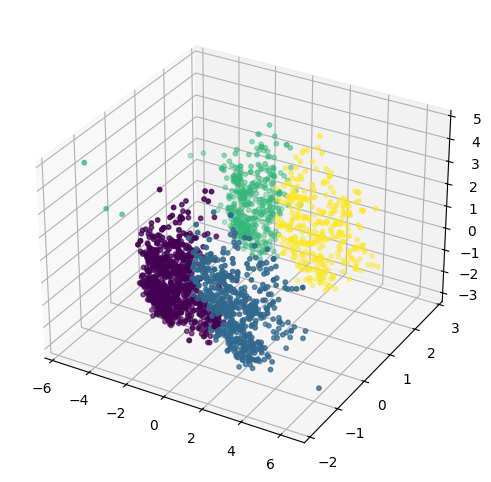

In [51]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(
    X_pca[:,0],
    X_pca[:,1],
    X_pca[:,2],
    c=labels_agg,
    cmap='viridis',
    s=10
)

# Characterisation of clusters

In [69]:

X["clusters"] = labels_agg

In [57]:
df_cleaned_data.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_tenure_days,Total_Spending,Total_Children,Living_with,labels,clusters
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone,3,3
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone,2,2
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner,1,1
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner,0,0
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner,0,0


<Axes: xlabel='clusters', ylabel='count'>

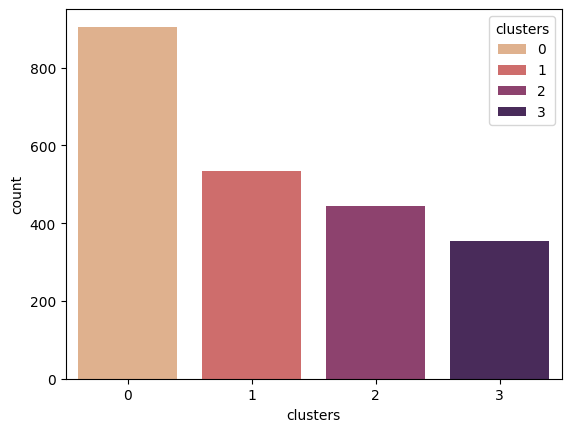

In [74]:
sns.countplot(x=X["clusters"],palette = 'flare',hue = X["clusters"])

<Axes: xlabel='Total_Spending', ylabel='Income'>

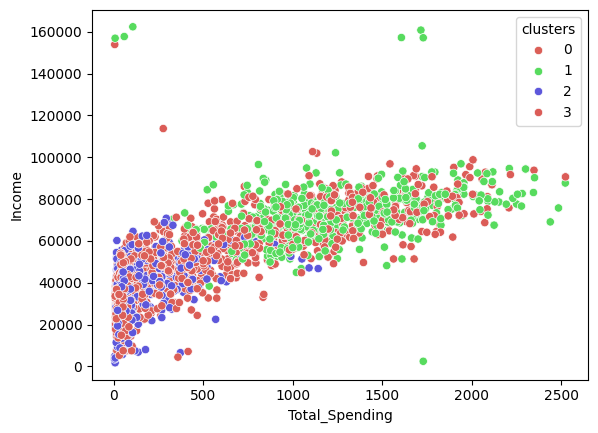

In [77]:
#income and spending patterns

sns.scatterplot(x=X["Total_Spending"],y=X["Income"],hue=X["clusters"],palette= 'hls')

In [72]:
#Cluster Summary

cluster_summary = X.groupby("clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        Age  Customer_tenure_days  Total_Spending  \
clu